# **Predicting Housing Prices in Austin Texas**
### **Group 3: Michelle Lai, Prashant Shukla, Mark Wu, and Dominic Woolridge**

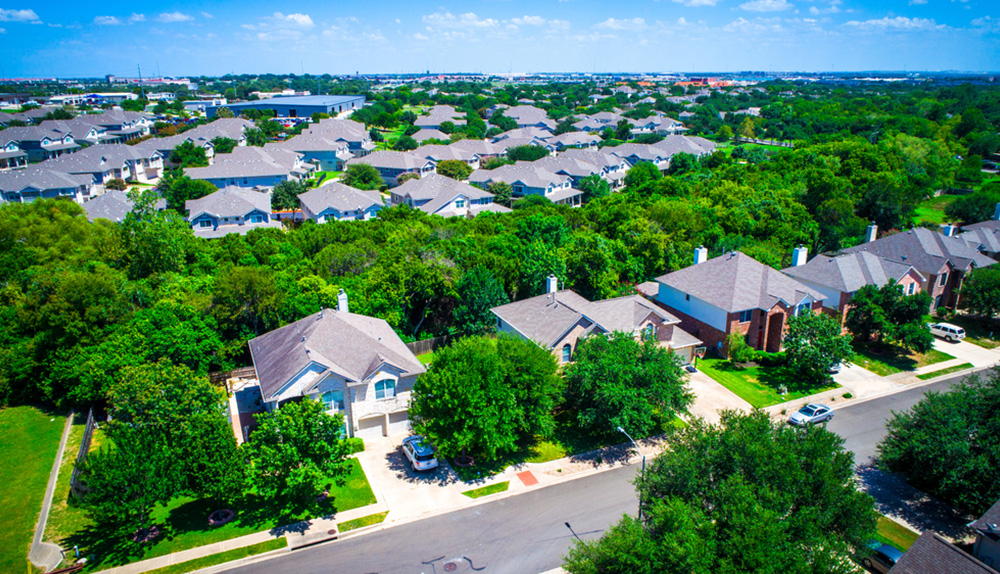

https://www.google.com/search?q=austin+tx+homes&tbm=isch&ved=2ahUKEwiGv__i6cH0AhWU6J4KHcv6B4YQ2-cCegQIABAA&oq=austin+tx+homes&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgYIABAIEB4yBggAEAgQHjIGCAAQCBAeMgYIABAIEB4yBggAEAgQHjIGCAAQCBAeMgYIABAIEB4yBAgAEBg6BAgAEEM6CAgAEIAEELEDOggIABCxAxCDAToHCAAQsQMQQzoLCAAQgAQQsQMQgwE6BggAEAUQHlCEB1jFFmCVF2gAcAB4AYAB2wKIAc8MkgEIMTIuMy4wLjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=ZgKnYYb0G5TR-wTL9Z-wCA&bih=865&biw=1182#imgrc=XpniEW3SAj7SZM

## **Import the necessary packages needed**

In [ ]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install --upgrade gensim
!pip install texthero
import texthero as hero

  Using cached gensim-4.1.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
texthero 1.1.0 requires gensim<4.0,>=3.6.0, but you have gensim 4.1.2 which is incompatible.
  Using cached gensim-3.8.3-cp37-cp37m-manylinux1_x86_64.whl (24.2 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [ ]:
!pip3 install --quiet "tensorflow>=1.7"
!pip3 install --quiet tensorflow-hub

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import math
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_hub as hub
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/3")

In [ ]:
%%capture
!pip install ipypublish
from ipypublish import nb_setup

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("drive/My Drive/Machine Learning")

In [ ]:
df = pd.read_csv('austinHousingData.csv')

In [ ]:
df.head() #Eyeball the data

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [ ]:
df.describe() #Descriptive statistics

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,6.733043,2019.078241,30.640432,0.012985,3.474722,1.710105,0.663371,0.466878,0.002768,0.208490,0.018852,1.190840e+05,2208.323314,0.940676,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,3.146760,0.813941,21.175174,0.179438,1.893351,0.788641,0.983779,0.824481,0.061771,0.488331,0.206775,1.225272e+07,1378.576119,0.236516,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,300.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03,1483.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.276000e+03,1975.000000,1.000000,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,39.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000,8.000000,12.000000,6.000000,8.000000,6.000000,2.000000,4.000000,8.000000,1.508483e+09,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


## **NLP Preprocessing**

In [ ]:
df['description'] = hero.clean(df['description']) #Clean text from capitalization, stop words, special characters, etc.
df['USE']=(hero.tfidf(df['description'], max_features=100)) #Vectorize text
print(df.shape)
df.head()

(15171, 48)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,USE
0,111373431,pflugerville,14424 Lake Victor Dr,78660,lake victor dr pflugerville tx single family h...,30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.215..."
1,120900430,pflugerville,1104 Strickling Dr,78660,absolutely gorgeous bedroom home full baths lo...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,"[0.0, 0.0, 0.1566037290174179, 0.1107485090401..."
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,construction estimated completion august pione...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,"[0.0, 0.0, 0.255752252187532, 0.0, 0.137371717..."
3,120901374,pflugerville,1025 Strickling Dr,78660,absolutely darling one story home charming sto...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,"[0.3069824982414804, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,60134862,pflugerville,15005 Donna Jane Loop,78660,brimming appeal warm livability sleek stylish ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.21498905208826297,..."


In [ ]:
x = zeros((len(df), len(df.USE[0])))
print(x.shape)
for j in range(len(df)):
    x[j,:] = df.USE[j]

(15171, 100)


In [ ]:
dfnlp = pd.DataFrame(x)

In [ ]:
dfnlp.shape

(15171, 100)

In [ ]:
dfnlp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.215668,0.0,0.00000,0.172761,0.193151,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.469618,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.190208,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.223925,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.23439,0.000000,0.000000,0.0,0.216445,0.0,0.000000,0.225809,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.232845,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.472661
1,0.000000,0.0,0.156604,0.110749,0.168233,0.000000,0.0,0.0,0.000000,0.0,0.15889,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.407746,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.346712,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.290805,0.0,0.000000,0.000000,0.000000,0.189194,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.198633,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.170011,0.178619,0.0,0.0,0.000000,0.000000,0.175469,0.0,0.0,0.000000,0.208891,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.255752,0.000000,0.137372,0.120896,0.0,0.0,0.116541,0.0,0.00000,0.186712,0.000000,0.0,0.0,0.0,0.0,0.154881,0.0,0.000000,0.000000,0.166309,0.0,0.138177,0.0,0.0,0.134746,0.0,0.000000,0.0,0.00000,0.0,0.205568,0.137614,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.220379,0.000000,0.000000,0.0,0.129203,0.000000,0.000000,0.0,0.267916,0.00000,0.316288,0.000000,0.0,0.000000,0.0,0.270520,0.000000,0.0,0.0,0.000000,0.148679,0.000000,0.000000,0.0,0.0,0.161442,0.000000,0.000000,0.0,0.0,0.257775,0.000000,0.0,0.0,0.0,0.000000
3,0.306982,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.209352,0.0,0.0,0.0,0.0,0.310659,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.238146,0.0,0.297383,0.000000,0.000000,0.000000,0.0,0.000000,0.314092,0.000000,0.0,0.000000,0.00000,0.000000,0.325330,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.551825,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.214989,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.30156,0.0,0.182781,0.000000,0.269151,0.225747,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.195950,0.305786,0.000000,0.0,0.000000,0.278469,0.244553,0.0,0.000000,0.00000,0.374970,0.000000,0.0,0.000000,0.0,0.240533,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


## **Dimensionality Reduction with PCA**

In [ ]:
scaler1 = StandardScaler()
scaler1.fit(dfnlp)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [ ]:
scaled_data=scaler1.transform(dfnlp)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df_pca = PCA(n_components=2)
df_pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
df_pca.explained_variance_ratio_

array([0.15211292, 0.03278653])

In [ ]:
pca_x = df_pca.transform(scaled_data)

In [ ]:
pca_x.shape

(15171, 2)

In [ ]:
df_pca = pd.DataFrame(pca_x)

In [ ]:
print(df_pca.shape)
print(df_pca.head())

(15171, 2)
          0         1
0  7.126972 -0.766729
1 -1.045979  3.891365
2 -2.246494 -3.315260
3 -0.602707  3.011169
4 -2.240411 -1.591949


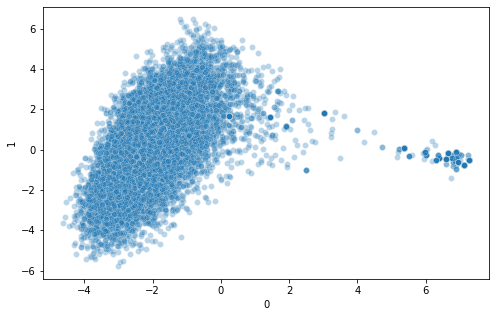

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df_pca[0], y=df_pca[1],
    palette='magma_r',
    data=df_pca,
    legend="full",
    alpha=0.3
)

## **Join Two DataFrames together**

In [ ]:
df2=pd.concat([df,df_pca], axis=1)

In [ ]:
df2.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,USE,0,1
0,111373431,pflugerville,14424 Lake Victor Dr,78660,lake victor dr pflugerville tx single family h...,30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.215...",7.126972,-0.766729
1,120900430,pflugerville,1104 Strickling Dr,78660,absolutely gorgeous bedroom home full baths lo...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,"[0.0, 0.0, 0.1566037290174179, 0.1107485090401...",-1.045979,3.891365
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,construction estimated completion august pione...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,"[0.0, 0.0, 0.255752252187532, 0.0, 0.137371717...",-2.246494,-3.315260
3,120901374,pflugerville,1025 Strickling Dr,78660,absolutely darling one story home charming sto...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,"[0.3069824982414804, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.602707,3.011169
4,60134862,pflugerville,15005 Donna Jane Loop,78660,brimming appeal warm livability sleek stylish ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.21498905208826297,...",-2.240411,-1.591949


## **Additional Preprocessing**

In [ ]:
#Explore number of bathrooms and bedrooms to identify any unusual datapoints.
print(df2.groupby(['numOfBathrooms']).size())
print(df2.groupby(['numOfBedrooms']).size())

#It appears there are 125 homes with 0 bathrooms and 47 homes with no bedrooms. It does not quite make sense for a home not to have a bathroom, so we will remove these points.
#We can argue and say that 0 bedroom homes may be a studio. Nevertheless, they make up a small percentage of the total data, so we will remove. 

numOfBathrooms
0.00      125
1.00      932
1.50       13
1.70        1
1.75        3
2.00     6101
2.50      126
2.75        2
3.00     5280
3.50       44
4.00     1884
4.50        5
5.00      408
5.50        2
6.00      157
6.50        1
7.00       61
8.00       17
9.00        2
10.00       5
13.00       1
27.00       1
dtype: int64
numOfBedrooms
0       47
1       98
2     1064
3     7440
4     5190
5     1171
6      128
7       13
8       18
10       1
20       1
dtype: int64


In [ ]:
df2.drop(df2.loc[df2['numOfBathrooms']==0].index,inplace=True)

In [ ]:
df2.drop(df2.loc[df['numOfBedrooms']==0].index,inplace=True)

In [ ]:
#A closer look into bed and bath metrics
print(df2.groupby(['numOfBathrooms']).size()/df2.groupby(['numOfBathrooms']).size().sum())
print(df2.groupby(['numOfBedrooms']).size()/df2.groupby(['numOfBedrooms']).size().sum())
#There are several number of bedrooms and bathrooms that make up a small percentage of the dataset. 
#Condition rule: If number of beds and baths is less than 10% of dataset, remove. 

numOfBathrooms
1.00     0.061660
1.50     0.000865
1.70     0.000067
1.75     0.000200
2.00     0.405481
2.50     0.008381
2.75     0.000133
3.00     0.351137
3.50     0.002927
4.00     0.125316
4.50     0.000333
5.00     0.027072
5.50     0.000133
6.00     0.010443
6.50     0.000067
7.00     0.004057
8.00     0.001131
9.00     0.000133
10.00    0.000333
13.00    0.000067
27.00    0.000067
dtype: float64
numOfBedrooms
1     0.006119
2     0.069709
3     0.492750
4     0.343954
5     0.077291
6     0.007982
7     0.000865
8     0.001197
10    0.000067
20    0.000067
dtype: float64


In [ ]:
df2.drop(df2.loc[(df2['numOfBathrooms']!=2) & (df2['numOfBathrooms']!=3) & (df2['numOfBathrooms']!=4)].index,inplace=True)

In [ ]:
df2.drop(df2.loc[(df2['numOfBedrooms']!=3) & (df2['numOfBedrooms']!=4)].index,inplace=True)

In [ ]:
print(df2.groupby(['numOfBathrooms']).size())
print(df2.groupby(['numOfBedrooms']).size())

numOfBathrooms
2.0    5628
3.0    4816
4.0    1305
dtype: int64
numOfBedrooms
3    6916
4    4833
dtype: int64


In [ ]:
df2['latestPrice'].describe()/1000

count      11.749000
mean      461.644445
std       268.220167
min         6.000000
25%       300.000000
50%       398.000000
75%       535.000000
max      3850.000000
Name: latestPrice, dtype: float64

In [ ]:
df2['numOfBedrooms'].describe()

count    11749.000000
mean         3.411354
std          0.492100
min          3.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: numOfBedrooms, dtype: float64

In [ ]:
print(df2['latestPrice'].quantile(0.1))
print(df2['latestPrice'].quantile(0.9))

239900.0
749801.6000000001


In [ ]:
df['latestPrice'].skew()

8.845543219647352

In [ ]:
#imputation using quantiles
df2['latestPrice'] = np.where(df2['latestPrice']<239900,239900,df2['latestPrice'])
df2['latestPrice'] = np.where(df2['latestPrice']>749801,749801,df2['latestPrice'])
df2['latestPrice'].skew()

0.6939873902518585

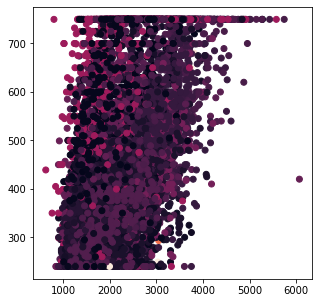

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(df2['livingAreaSqFt'], df2['latestPrice'] /1000, c=df2['zipcode'], cmap='rocket_r') #SquareFt and Price

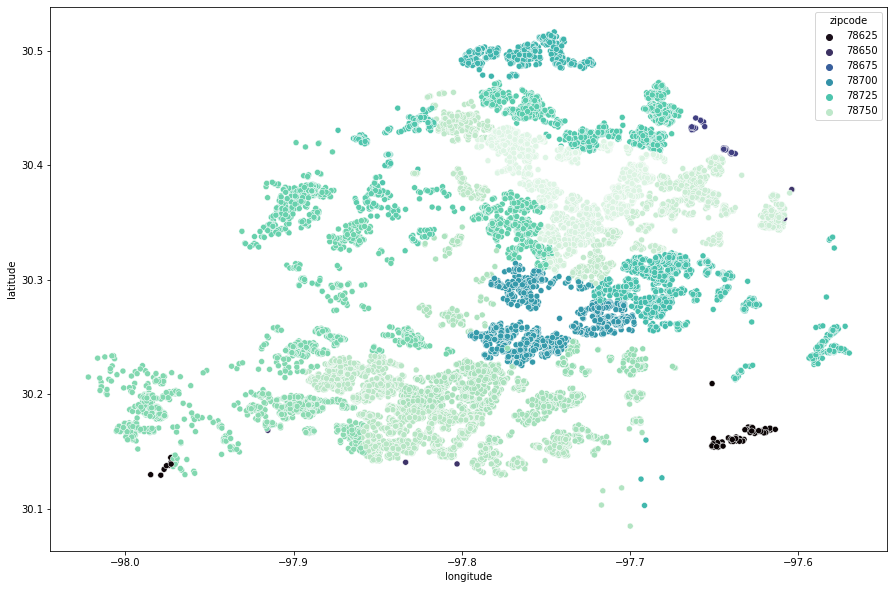

In [ ]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=df2, x="longitude", y="latitude", hue="zipcode", palette="mako"); #Scatterplot of lat/long and zipcode 

In [ ]:
dfc = df2.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11749 entries, 0 to 15169
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        11749 non-null  int64  
 1   city                        11749 non-null  object 
 2   streetAddress               11749 non-null  object 
 3   zipcode                     11749 non-null  int64  
 4   description                 11749 non-null  object 
 5   latitude                    11749 non-null  float64
 6   longitude                   11749 non-null  float64
 7   propertyTaxRate             11749 non-null  float64
 8   garageSpaces                11749 non-null  int64  
 9   hasAssociation              11749 non-null  bool   
 10  hasCooling                  11749 non-null  bool   
 11  hasGarage                   11749 non-null  bool   
 12  hasHeating                  11749 non-null  bool   
 13  hasSpa                      117

In [ ]:
df2.shape

(11749, 50)

In [ ]:
df2.isnull().sum() #no missing data

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [ ]:
df2['latest_sale_date'] = df2['latest_saledate'].str[-2:] #instead of datetime, just deliminate the date by parts, Year, Month, Day
df2.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,USE,0,1,latest_sale_date
0,111373431,pflugerville,14424 Lake Victor Dr,78660,lake victor dr pflugerville tx single family h...,30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.215...",7.126972,-0.766729,02
1,120900430,pflugerville,1104 Strickling Dr,78660,absolutely gorgeous bedroom home full baths lo...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,"[0.0, 0.0, 0.1566037290174179, 0.1107485090401...",-1.045979,3.891365,13
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,construction estimated completion august pione...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,"[0.0, 0.0, 0.255752252187532, 0.0, 0.137371717...",-2.246494,-3.315260,31
3,120901374,pflugerville,1025 Strickling Dr,78660,absolutely darling one story home charming sto...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,"[0.3069824982414804, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.602707,3.011169,08
4,60134862,pflugerville,15005 Donna Jane Loop,78660,brimming appeal warm livability sleek stylish ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.21498905208826297,...",-2.240411,-1.591949,31


In [ ]:
df2['Association'] = df2['hasAssociation'].astype(int)
df2['Cooling'] = df2['hasCooling'].astype(int)
df2['Heating'] = df2['hasHeating'].astype(int)
df2['spa'] = df2['hasSpa'].astype(int)
df2['view'] = df2['hasView'].astype(int)

In [ ]:
df2.drop('hasAssociation', axis=1, inplace=True)
df2.drop('hasCooling', axis=1, inplace=True)
df2.drop('hasSpa', axis=1, inplace=True)
df2.drop('hasView', axis=1, inplace=True)
df2.drop('hasHeating', axis=1, inplace=True)

In [ ]:
#garageSpaces and hasGarage are likely correlated since they imply the same thing. Keeping both will result in multicolinearity. We will remove hasGarage from the dataset. 
df2.drop('hasGarage', axis=1, inplace=True)

In [ ]:
#In this machine learning project, we do not plan to use images to predict the latestPrice dependent variable. Therefore, we will also remove this feature
df2.drop('homeImage', axis=1, inplace=True)

In [ ]:
#We have the latest sale date deliminated, so we can remove latest_saledate.
df2.drop('latest_saledate', axis=1, inplace=True)

In [ ]:
#Latitude and Longitude are already provide, so streetAddress may not be as necessary. It would also not be practical to encode each unique address. This feature will be removed.
df2.drop('streetAddress', axis=1, inplace=True)

In [ ]:
#Drop agency listing the price
df2.drop('latestPriceSource',axis=1, inplace=True)

In [ ]:
#Not much info is provided in zpid, so we will remove it
df2.drop('zpid',axis=1,inplace=True)

In [ ]:
print(df2['homeType'].unique())
print(df2['city'].unique())

['Single Family' 'Residential' 'Townhouse' 'Condo' 'Mobile / Manufactured'
 'Other' 'Vacant Land' 'Apartment' 'Multiple Occupancy' 'MultiFamily']
['pflugerville' 'del valle' 'austin' 'driftwood' 'manor'
 'dripping springs' 'manchaca']


In [ ]:
#One Hot Encoding Categorical variables: homeType and city
df2_categorical = [pd.get_dummies(df2['homeType'], prefix = 'Home_Type', prefix_sep ='_'),
                  pd.get_dummies(df2['city'], prefix = 'City', prefix_sep ='_')]

In [ ]:
df2_categorical=pd.concat(df2_categorical, axis=1)
df3 = pd.concat([df2, df2_categorical], axis=1)


In [ ]:
#Drop original categorical data we encoded
df3.drop('city',axis=1,inplace=True)
df3.drop('homeType',axis=1,inplace=True)

In [ ]:
#To avoid multicolinearity between the dummy variables, we will remove 1 unique value from each encoded column
df3.drop('Home_Type_Apartment',axis=1,inplace=True)
df3.drop('City_del valle',axis=1,inplace=True)

In [ ]:
df3.info() #quick look of all columns thus far

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11749 entries, 0 to 15169
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   zipcode                          11749 non-null  int64  
 1   description                      11749 non-null  object 
 2   latitude                         11749 non-null  float64
 3   longitude                        11749 non-null  float64
 4   propertyTaxRate                  11749 non-null  float64
 5   garageSpaces                     11749 non-null  int64  
 6   parkingSpaces                    11749 non-null  int64  
 7   yearBuilt                        11749 non-null  int64  
 8   latestPrice                      11749 non-null  float64
 9   numPriceChanges                  11749 non-null  int64  
 10  latest_salemonth                 11749 non-null  int64  
 11  latest_saleyear                  11749 non-null  int64  
 12  numOfPhotos       

In [ ]:
#hero.scatterplot(df3, col='Encoder',title='Text Encoding', hover_data=['description','latestPrice'])

In [ ]:
df3.head()

,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,USE,0,1,latest_sale_date,Association,Cooling,Heating,spa,view,Home_Type_Condo,Home_Type_Mobile / Manufactured,Home_Type_MultiFamily,Home_Type_Multiple Occupancy,Home_Type_Other,Home_Type_Residential,Home_Type_Single Family,Home_Type_Townhouse,Home_Type_Vacant Land,City_austin,City_driftwood,City_dripping springs,City_manchaca,City_manor,City_pflugerville
0,78660,lake victor dr pflugerville tx single family h...,30.430632,-97.663078,1.98,2,2,2012,305000.0,5,9,2019,39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.215...",7.126972,-0.766729,02,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,78660,absolutely gorgeous bedroom home full baths lo...,30.432673,-97.661697,1.98,2,2,2013,295000.0,1,10,2020,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,"[0.0, 0.0, 0.1566037290174179, 0.1107485090401...",-1.045979,3.891365,13,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,78660,construction estimated completion august pione...,30.409748,-97.639771,1.98,0,0,2018,256125.0,1,7,2019,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,"[0.0, 0.0, 0.255752252187532, 0.0, 0.137371717...",-2.246494,-3.315260,31,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,78660,absolutely darling one story home charming sto...,30.432112,-97.661659,1.98,2,2,2013,240000.0,4,8,2018,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,"[0.3069824982414804, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.602707,3.011169,08,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,78660,brimming appeal warm livability sleek stylish ...,30.437368,-97.656860,1.98,0,0,2002,239900.0,3,10,2018,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.21498905208826297,...",-2.240411,-1.591949,31,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df3.drop('description',axis=1,inplace=True)

In [ ]:
df3.drop('USE',axis=1,inplace=True)

In [ ]:
df3 = df3.apply(pd.to_numeric)

In [ ]:
df3.columns

Index([                        'zipcode',                        'latitude',
                             'longitude',                 'propertyTaxRate',
                          'garageSpaces',                   'parkingSpaces',
                             'yearBuilt',                     'latestPrice',
                       'numPriceChanges',                'latest_salemonth',
                       'latest_saleyear',                     'numOfPhotos',
            'numOfAccessibilityFeatures',                 'numOfAppliances',
                  'numOfParkingFeatures',      'numOfPatioAndPorchFeatures',
                 'numOfSecurityFeatures',         'numOfWaterfrontFeatures',
                   'numOfWindowFeatures',          'numOfCommunityFeatures',
                           'lotSizeSqFt',                  'livingAreaSqFt',
                   'numOfPrimarySchools',          'numOfElementarySchools',
                    'numOfMiddleSchools',                'numOfHighSchools',

# **EDA: Visualization and Final Variables Analysis**

In [ ]:
df3['latestPrice'].describe() #summary statistics 

count     11749.000000
mean     434213.704826
std      161109.048195
min      239900.000000
25%      300000.000000
50%      398000.000000
75%      535000.000000
max      749801.000000
Name: latestPrice, dtype: float64

Text(0.5, 6.79999999999999, 'House Price ')

<Figure size 864x360 with 0 Axes>

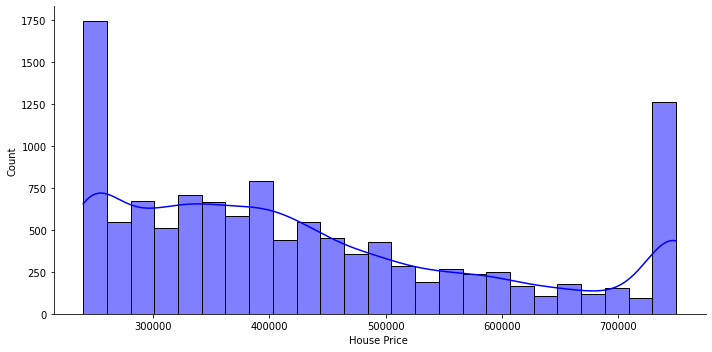

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(x=df3['latestPrice'], kde=True, aspect=2, color='blue')
plt.xlabel('House Price ')

Text(0.5, 1.0, 'Scatter Plot for yearBuilt')

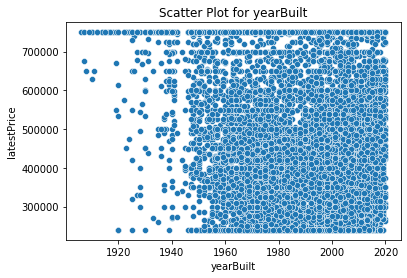

In [ ]:
scatter_yearBuilt = sns.scatterplot(x = df3['yearBuilt'], y =df3['latestPrice'])
scatter_yearBuilt.set_title('Scatter Plot for yearBuilt')

[Text(0, 0.5, 'House Price'), Text(0.5, 0, 'Living Area by Sq Ft')]

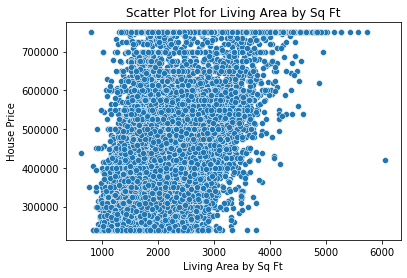

In [ ]:
scatter_yearBuilt = sns.scatterplot(x = df3['livingAreaSqFt'], y =df3['latestPrice'])
scatter_yearBuilt.set_title('Scatter Plot for Living Area by Sq Ft')
scatter_yearBuilt.set(xlabel='Living Area by Sq Ft',ylabel='House Price')

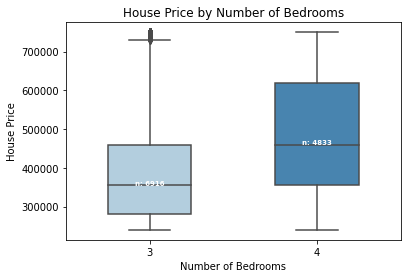

In [ ]:
boxplot_bd = sns.boxplot(x = df3['numOfBedrooms'], y =df3['latestPrice'], palette ="Blues", width=0.5)
boxplot_bd.set_title('House Price by Number of Bedrooms')
boxplot_bd.set(xlabel='Number of Bedrooms',ylabel='House Price')

medians = df3.groupby(['numOfBedrooms'])['latestPrice'].median().values
nobs = df3['numOfBedrooms'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,boxplot_bd.get_xticklabels()):
    boxplot_bd.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

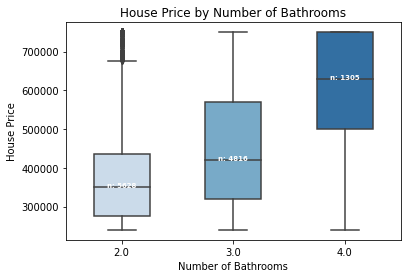

In [ ]:
boxplot_br = sns.boxplot(x = df3['numOfBathrooms'], y =df3['latestPrice'], palette ="Blues", width=0.5)
boxplot_br.set_title('House Price by Number of Bathrooms')
boxplot_br.set(xlabel='Number of Bathrooms',ylabel='House Price')
 
medians = df3.groupby(['numOfBathrooms'])['latestPrice'].median().values
nobs = df3['numOfBathrooms'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
pos = range(len(nobs))
for tick,label in zip(pos,boxplot_br.get_xticklabels()):
   boxplot_br.text(pos[tick],
           medians[tick] + 0.03,
           nobs[tick],
           horizontalalignment='center',
           size='x-small',
           color='w',
           weight='semibold')

In [ ]:
c = df3.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

sorted_corr = so.sort_values(ascending=False)
print(sorted_corr)

City_pflugerville           City_pflugerville             1.000000
numOfAccessibilityFeatures  numOfAccessibilityFeatures    1.000000
longitude                   longitude                     1.000000
propertyTaxRate             propertyTaxRate               1.000000
garageSpaces                garageSpaces                  1.000000
                                                            ...   
numOfPhotos                 avgSchoolDistance             0.000038
zipcode                     City_dripping springs         0.000019
City_dripping springs       zipcode                       0.000019
numPriceChanges             lotSizeSqFt                   0.000007
lotSizeSqFt                 numPriceChanges               0.000007
Length: 3136, dtype: float64


In [ ]:
corr_pairs = np.where(c > 0.5)
corr_pairs = [(c.index[x], c.columns[y]) for x, y in zip(*corr_pairs)
                                        if x != y and x < y]
print(corr_pairs)

[('zipcode', 'City_austin'), ('longitude', 'avgSchoolRating'), ('longitude', 'MedianStudentsPerTeacher'), ('garageSpaces', 'parkingSpaces'), ('garageSpaces', 'numOfParkingFeatures'), ('parkingSpaces', 'numOfParkingFeatures'), ('yearBuilt', 'Association'), ('latestPrice', 'livingAreaSqFt'), ('latest_saleyear', 'numOfPatioAndPorchFeatures'), ('numOfPatioAndPorchFeatures', 'numOfSecurityFeatures'), ('numOfCommunityFeatures', 'Home_Type_Residential'), ('livingAreaSqFt', 'avgSchoolRating'), ('livingAreaSqFt', 'numOfBathrooms'), ('livingAreaSqFt', 'numOfBedrooms'), ('numOfPrimarySchools', 'numOfElementarySchools'), ('numOfPrimarySchools', 'numOfMiddleSchools'), ('avgSchoolRating', 'avgSchoolSize'), ('avgSchoolRating', 'MedianStudentsPerTeacher'), ('avgSchoolSize', 'MedianStudentsPerTeacher'), ('numOfBathrooms', 'numOfStories'), ('Cooling', 'Heating'), ('Home_Type_Condo', 'Home_Type_Single Family'), ('City_austin', 'City_pflugerville')]


In [ ]:
df_corr = df3[['latestPrice', 'garageSpaces', 'parkingSpaces', 'numOfPrimarySchools', 'numOfElementarySchools', 'Cooling', 'Heating', 'livingAreaSqFt', 'numOfBathrooms', 'avgSchoolRating', 'MedianStudentsPerTeacher', 'Home_Type_Single Family']]
print(df_corr)

       latestPrice  ...  Home_Type_Single Family
0         305000.0  ...                        1
1         295000.0  ...                        1
2         256125.0  ...                        1
3         240000.0  ...                        1
4         239900.0  ...                        1
...            ...  ...                      ...
15165     280000.0  ...                        1
15166     330000.0  ...                        1
15167     550000.0  ...                        1
15168     749801.0  ...                        1
15169     420000.0  ...                        0

[11749 rows x 12 columns]


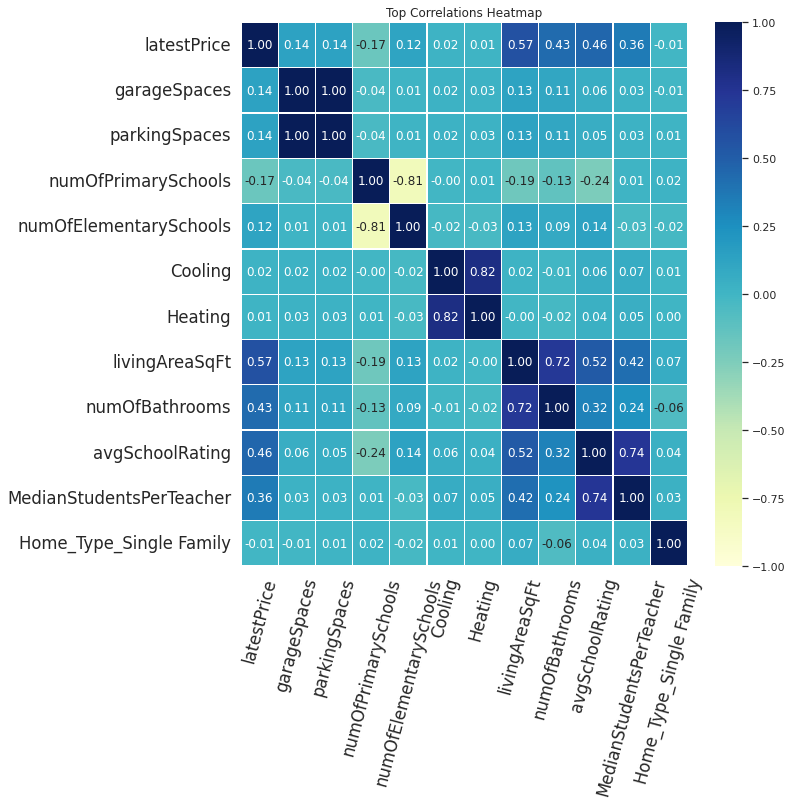

In [ ]:
#Correlation Heatmap for most correlated features
plt.subplots(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot = True,cmap="YlGnBu", fmt = ".2f", linewidths=.3)
plt.title('Top Correlations Heatmap')
plt.xticks(rotation = 75)
plt.show()

## **Machine Learning Algorithms**

- Lasso Regression
- Linear Regression
- Deep Learning Neural Network

In [ ]:
df5 = df3
y=df5.pop('latestPrice')
X=df5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



## **Lasso Regression**

In [ ]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train) 
pred_train_lasso= lasso_model.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.760e+13, tolerance: 2.125e+10



In [ ]:
lasso_model.coef_

array([-45733.9456159 ,  -4137.38598114,  14262.21836197, -34300.22284487,
        -8853.65998943,   3546.75401068, -19197.9623863 , -20317.17101894,
         3499.25375545,  13454.3134235 ,   3923.12226823,    423.77014368,
         1831.624669  ,   7713.61548102,   4135.46436815,   1416.6444167 ,
         1658.08410439,   2059.99865847,  -3453.93243707,   -605.25454352,
        88363.13206483,  13876.34199574,  17205.50424907,  -2879.3549829 ,
       -11742.49948521,  -8054.68792459,  59659.50774215, -21850.17547556,
         4224.49169358,  18780.90701282, -13060.44188695,  -9178.08170622,
         1646.02006985,  -4841.72522424,    679.05901511, -33794.27938134,
         1445.62409442,  -1748.06646868,   4599.63213377,   2923.95606405,
        13492.53453516,   -755.98701727,  -2475.23412185,   1248.43630612,
         3118.44150072,   3519.79803898,   9005.990096  ,   8022.56609748,
         -814.46801048,  32479.45789762,   1454.42930735,      0.        ,
         2048.12347717,  

In [ ]:
pd.Series(lasso_model.coef_, index = X.columns)

zipcode                           -45733.945616
latitude                           -4137.385981
longitude                          14262.218362
propertyTaxRate                   -34300.222845
garageSpaces                       -8853.659989
parkingSpaces                       3546.754011
yearBuilt                         -19197.962386
numPriceChanges                   -20317.171019
latest_salemonth                    3499.253755
latest_saleyear                    13454.313423
numOfPhotos                         3923.122268
numOfAccessibilityFeatures           423.770144
numOfAppliances                     1831.624669
numOfParkingFeatures                7713.615481
numOfPatioAndPorchFeatures          4135.464368
numOfSecurityFeatures               1416.644417
numOfWaterfrontFeatures             1658.084104
numOfWindowFeatures                 2059.998658
numOfCommunityFeatures             -3453.932437
lotSizeSqFt                         -605.254544
livingAreaSqFt                     88363

## **Linear Regression**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_train_lr= lr_model.predict(X_train)
print('RMSE score on training set: ', np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print('R² score on training set: ', r2_score(y_train, pred_train_lr))

pred_test_lr= lr_model.predict(X_test)
print('RMSE on test set: ', np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print('R² score on test set: ', r2_score(y_test, pred_test_lr))

RMSE score on training set:  96326.28186536109
R² score on training set:  0.6408384711466684
RMSE on test set:  100468.72443169027
R² score on test set:  0.6152035256208821


In [ ]:
pred_test_lr= lr_model.predict(X_test)
MAE_LR = mean_absolute_error(y_test, pred_test_lr)
RMSE_LR = np.sqrt(mean_squared_error(y_test,pred_test_lr))
R2_LR = r2_score(y_test, pred_test_lr)
pd.DataFrame([MAE_LR, RMSE_LR, R2_LR], index=['MAE on test set', 'RMSE on test set', 'R2 on test set'], columns=['Linear Regression Metrics'])

,Linear Regression Metrics
MAE on test set,76221.654691
RMSE on test set,100468.724432
R2 on test set,0.615204


Text(0, 0.5, 'Predicted')

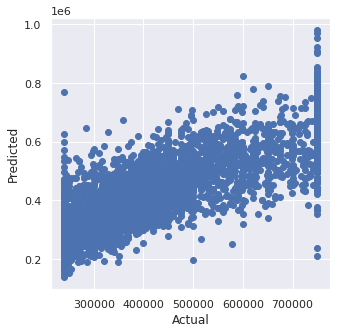

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, pred_test_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### StatsModelAPI

In [ ]:
X = sm.add_constant(X, prepend=True) #Adds regression intercept
results = sm.OLS(y,X).fit() #Ordinary lease squares

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     370.4
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:07:58   Log-Likelihood:            -1.5161e+05
No. Observations:               11749   AIC:                         3.033e+05
Df Residuals:                   11693   BIC:                         3.038e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## **Deep Learning Neural Network**

In [ ]:
model = Sequential()

In [ ]:
X_train.shape

(8224, 55)

In [ ]:
model.add(Dense(64, activation='relu', input_dim = 55))
model.add(Dense(64, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) #Returns number, not sigmoid 0,1 function

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

In [ ]:
early_stopping = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=2, 
        patience=25)

In [ ]:
model.fit(X_train, y_train, epochs=2000, 
          batch_size=64, validation_data=(X_test, y_test), 
          callbacks=[early_stopping])

Epoch 1/2000
129/129 [==============================] - 1s 4ms/step - loss: 213928869888.0000 - mse: 213928869888.0000 - mae: 433710.6250 - val_loss: 214108405760.0000 - val_mse: 214108405760.0000 - val_mae: 433544.5312
Epoch 2/2000
129/129 [==============================] - 0s 3ms/step - loss: 203022958592.0000 - mse: 203022958592.0000 - mae: 421862.1562 - val_loss: 183161405440.0000 - val_mse: 183161405440.0000 - val_mae: 399328.8750
Epoch 3/2000
129/129 [==============================] - 0s 2ms/step - loss: 134992756736.0000 - mse: 134992756736.0000 - mae: 334196.5312 - val_loss: 81586274304.0000 - val_mse: 81586274304.0000 - val_mae: 245693.8438
Epoch 4/2000
129/129 [==============================] - 0s 3ms/step - loss: 50014294016.0000 - mse: 50014294016.0000 - mae: 176647.7656 - val_loss: 34381762560.0000 - val_mse: 34381762560.0000 - val_mae: 141660.3750
Epoch 5/2000
129/129 [==============================] - 0s 2ms/step - loss: 28301107200.0000 - mse: 28301107200.0000 - mae: 12

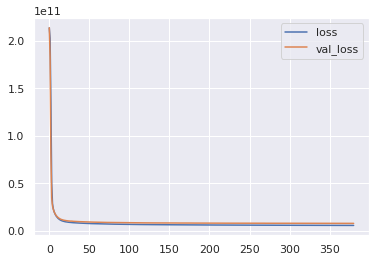

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [ ]:
yhat = model.evaluate(X_test, y_test, batch_size=64 )

56/56 [==============================] - 0s 1ms/step - loss: 7552224768.0000 - mse: 7552224768.0000 - mae: 61363.8359


Text(0, 0.5, 'Predicted')

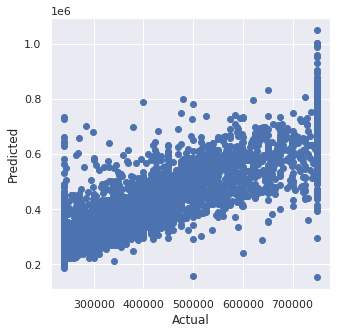

In [ ]:
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [ ]:
mse = 7469159936

RMSE = math.sqrt(mse)
RMSE

86424.30176750055

In [ ]:
y_pred

array([374268.12, 436630.66, 268855.6 , ..., 309218.4 , 660599.94,
       382494.44], dtype=float32)

In [103]:
y_test

8298     350000.0
5924     339000.0
7263     287500.0
9479     749801.0
7194     469000.0
           ...   
3710     400000.0
12148    255000.0
12192    359999.0
1542     689000.0
12441    425000.0
Name: latestPrice, Length: 3525, dtype: float64